In [1]:
import autograd.numpy as np
from autograd import grad, jacobian
from scipy.optimize import minimize
import copy
from model import create_ploy_basis_file, find_cq
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"

np.random.seed(0)

# specify f
dimension = 3
def f(x):
    return np.array([x[0]*(x[1]-x[2]), x[1]*(x[2]-x[0]), x[2]*(x[0]-x[1])])


# specify x
num_points = 100
x = np.random.normal(0,1,(dimension,num_points))

# load basis file
create_ploy_basis_file(orders=[1,2,3], num_variable=dimension, path="./basis.txt")
bases = np.loadtxt('./basis.txt', dtype='str')


In [2]:
tol_cq = 1e-8
tol_dep = 1e-8
results = find_cq(f, x, bases, tol_cq=tol_cq, tol_dep=tol_dep, sparse_run=10, sparse_tol=1e-32)

#### Computing bases and gradients #####
#### Solving thetas ####
#### Sparsifying thetas ####
0/10
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
#### Selecting independent CQs ####
CQ number=2 , confidence=1.0


Text(0, 0.5, 'singulvar value $\\sigma_i$')

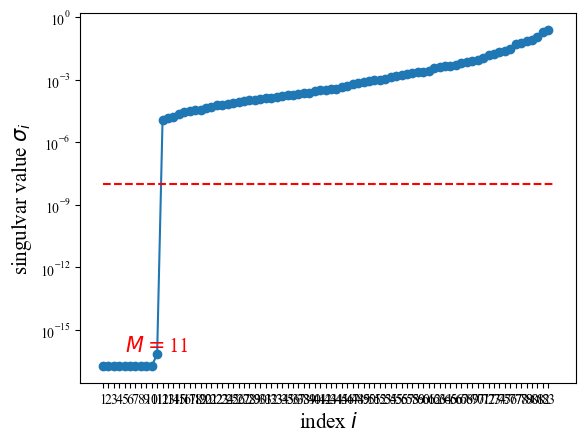

In [3]:
s_cq = results['s_cq'][::-1]
n_cq_dep = np.sum(s_cq<tol_cq)
plt.plot(np.arange(s_cq.shape[0])+1,s_cq,marker="o")
plt.plot([1, s_cq.shape[0]+1],[tol_cq, tol_cq], ls="--",color="red")
plt.text(5,1e-16,r"$M=$"+"{}".format(n_cq_dep),fontsize=15,color="red")
plt.yscale('log')
plt.xticks(np.arange(s_cq.shape[0])+1);
plt.xlabel('index '+r"$i$", fontsize=15)
plt.ylabel('singulvar value '+r"$\sigma_i$", fontsize=15)

Text(0, 0.5, 'singulvar value $s_i$')

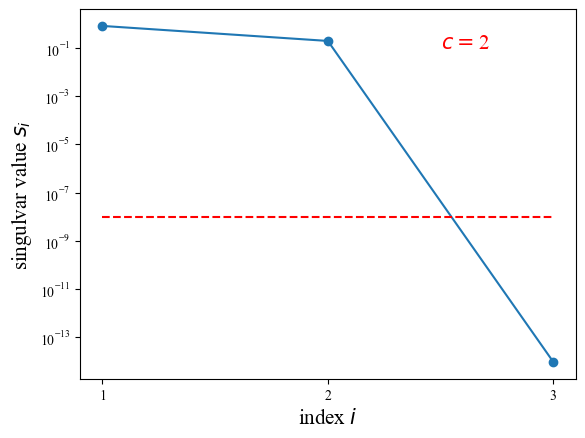

In [4]:
S = results['s_cq_independent']
n_cq_indep = np.sum(np.mean(S, axis=0)>tol_dep)
plt.plot(np.arange(S.shape[1])+1,np.mean(S, axis=0),marker="o")
plt.plot([1, S.shape[1]],[tol_dep, tol_dep], ls="--",color="red")
plt.text(2.5,1e-1,r"$c=$"+"{}".format(n_cq_indep),fontsize=15,color="red")
plt.yscale('log')
plt.xticks(np.arange(S.shape[1])+1);
plt.xlabel('index '+r"$i$", fontsize=15)
plt.ylabel('singulvar value '+r"$s_i$", fontsize=15)

Text(0.5, 0.95, 'LV: up to 6th polynomials')

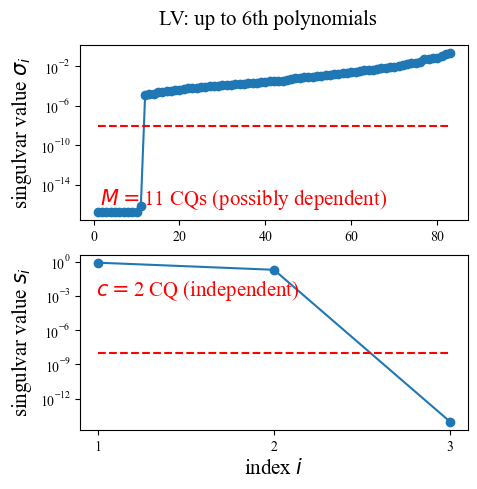

In [5]:
plt.figure(figsize=(5,5))

plt.subplot(2,1,1)

s_cq = results['s_cq'][::-1]
plt.plot(np.arange(s_cq.shape[0])+1,s_cq,marker="o")
plt.plot([1, s_cq.shape[0]],[tol_cq, tol_cq], ls="--",color="red")
#plt.text(1.4,1e-16,r"$M=$"+"{}".format(n_cq_dep)+" CQ",fontsize=15,color="red")
plt.text(1.4,1e-16,r"$M=$"+"{}".format(n_cq_dep)+" CQs (possibly dependent)",fontsize=15,color="red")
plt.yscale('log')
#plt.xticks(np.arange(s_cq.shape[0])+1);
#plt.xlabel('index '+r"$i$", fontsize=15)
plt.ylabel('singulvar value '+r"$\sigma_i$", fontsize=15)

plt.subplot(2,1,2)
S = results['s_cq_independent']
plt.plot(np.arange(S.shape[1])+1,np.mean(S, axis=0),marker="o")
plt.plot([1, S.shape[1]],[tol_dep, tol_dep], ls="--",color="red")
#plt.text(0.99,1e-3,r"$c=$"+"{}".format(n_cq_indep)+" CQ",fontsize=15,color="red")
plt.text(0.99,1e-3,r"$c=$"+"{}".format(n_cq_indep)+" CQ (independent)",fontsize=15,color="red")
plt.yscale('log')
plt.xticks(np.arange(S.shape[1])+1);
plt.xlabel('index '+r"$i$", fontsize=15)
plt.ylabel('singulvar value '+r"$s_i$", fontsize=15)

plt.suptitle('LV: up to 6th polynomials', y =0.95, fontsize=15)

#plt.savefig('./fig/LV_sv_poly6.pdf', bbox_inches="tight")

FileNotFoundError: [Errno 2] No such file or directory: './fig/LV_Theta.pdf'

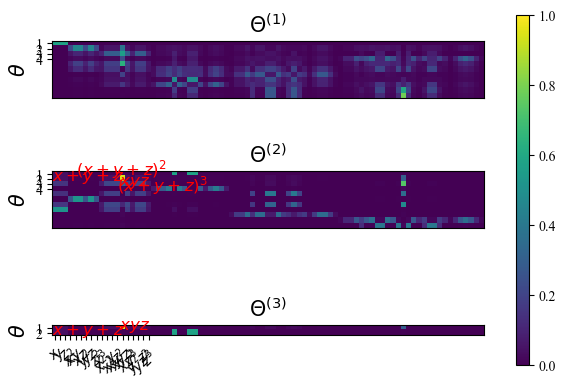

In [7]:



fig, axes = plt.subplots(nrows=3, ncols=1)
ii = 0
for ax in axes.flat:
    if ii == 0:
        plt.subplot(3,1,1)
        sols = results['sol_cq']
        #ax.xaxis.tick_top()
        #ticks = [r'$x$',r'$y$',r'$z$',r'$x^2$',r'$xy$',r'$xz$',r'$y^2$',r'$yz$',r'$z^2$',r'$x^3$',r'$x^2y$',r'$x^2z$',r'$xy^2$',r'$xyz$',r'$xz^2$',r'$y^3$', r'$y^2z$', r'$yz^2$', r'$z^3$']
        #ax.set_xticks(np.arange(19),ticks,rotation=45)
        ax.set_xticks([])
        ax.set_yticks([0,1,2,3],[1,2,3,4])
        ax.set_title(r'$\Theta^{(1)}$',fontsize=15)
        im = ax.imshow(np.abs(sols), vmin=0, vmax=1)
        ax.set_ylabel(r'$\theta$', fontsize=15)
    elif ii == 1:
        sols = results['sol_cq_sparse']
        ax.set_xticks([])
        ax.set_yticks([0,1,2,3],[1,2,3,4])
        im = ax.imshow(np.abs(sols), vmin=0, vmax=1)
        ax.set_title(r'$\Theta^{(2)}$',fontsize=15)
        ax.set_ylabel(r'$\theta$', fontsize=15)
        ax.text(12,3.3,r"$(x+y+z)^3$",color="red",fontsize=12)
        ax.text(-0.5,1.3,r"$x+y+z$",color="red",fontsize=12)
        ax.text(12.3,2.3,r"$xyz$",color="red",fontsize=12)
        ax.text(4,0.3,r"$(x+y+z)^2$",color="red",fontsize=12)
    else:
        sols = results['sol_cq_independent']
        ax.set_yticks([0,1,2,3],[1,2,3,4])
        ax.set_xticks([])
        im = ax.imshow(np.abs(sols), vmin=0, vmax=1)
        ax.set_title(r'$\Theta^{(3)}$',fontsize=15)
        ticks = [r'$x$',r'$y$',r'$z$',r'$x^2$',r'$xy$',r'$xz$',r'$y^2$',r'$yz$',r'$z^2$',r'$x^3$',r'$x^2y$',r'$x^2z$',r'$xy^2$',r'$xyz$',r'$xz^2$',r'$y^3$', r'$y^2z$', r'$yz^2$', r'$z^3$']
        ax.set_xticks(np.arange(19),ticks,rotation=45)
        ax.set_ylabel(r'$\theta$', fontsize=15)
        ax.text(12.3,0.3,r"$xyz$",color="red",fontsize=12)
        ax.text(-0.5,1.3,r"$x+y+z$",color="red",fontsize=12)
    ii += 1

        

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.73])
fig.colorbar(im, cax=cbar_ax)

#plt.show()
#plt.savefig('./fig/LV_Theta.pdf', bbox_inches="tight")